<center>
<img src="../../img/beeline_data_school_logo.png">
# "Прикладной анализ данных"
#### Интенсивный курс по изучению машинного обучения и анализа данных
<img src="../../img/beeline_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

## Практическое задание. Анализ данных пассажиров "Титаника"

In [264]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_colwidth',1000)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Считаем данные из файла в память в виде объекта Pandas.DataFrame

In [265]:
data = pd.read_csv('../../datasets/titanic/train.csv')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [236]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Возьмем первые 10 элементов столбца Parch - количество родителей и детей пассажира на борту:**

In [237]:
data['Parch'][:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

**Отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br />
Если нет - посмотрите, как вычисляется выражение в квадратных в скобках.

In [313]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)]

118                           Baxter Mr Quigg Edmond
258                                   Ward Miss Anna
299      Baxter Mrs James Helene DeLaudeniere Chaput
311                         Ryerson Miss Emily Borie
377                          Widener Mr Harry Elkins
380                              Bidois Miss Rosalie
557                                Robbins Mr Victor
679                 Cardeza Mr Thomas Drake Martinez
700    Astor Mrs John Jacob Madeleine Talmadge Force
716                      Endres Miss Caroline Louise
737                             Lesurer Mr Gustave J
742              Ryerson Miss Susan Parker "Suzette"
Name: Name, dtype: object

**1. Сколько мужчин / жещин находилось на борту?**

In [239]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение погибших/выживших по переменной Pclass (социально-экономический статус). Дополнительно - это же распределение, но еще учитывая пол.**


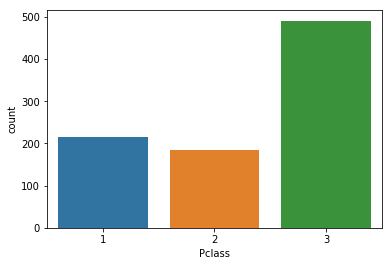

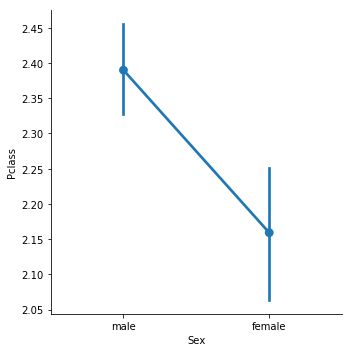

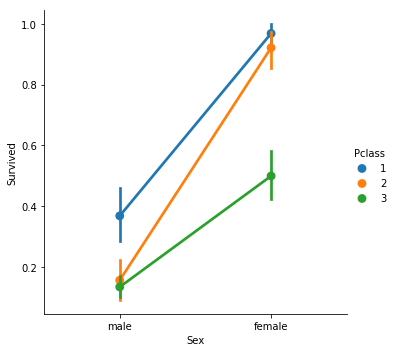

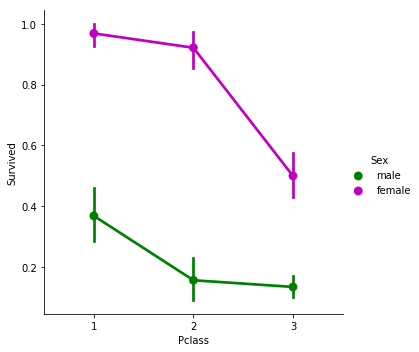

In [240]:
# кол-во по каждому классу
sns.countplot(data['Pclass']);
# кол-во по каждому классу
sns.catplot(x="Sex", y="Pclass", kind="point", data=data);
# кол-во по каждому классу учитывая пол
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=data);
# тоже самое что и выше
sns.catplot(x="Pclass", y="Survived", hue="Sex",
            palette={"male": "g", "female": "m"},
            kind="point", data=data);

**3. Сколько в среднем заплатил один пассажир? Найдите дисперсию этой величины. Сколько все пассажиры заплатили в сумме?**

In [241]:
print("в среднем заплатил один пассажир: " + str(data['Fare'].mean()))
print("дисперсия: " + str(data['Fare'].std()))
print("все пассажиры в сумме: " + str(data['Fare'].sum()))

в среднем заплатил один пассажир: 32.2042079685746
дисперсия: 49.693428597180905
все пассажиры в сумме: 28693.9493


**4. Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики? Пусть "молодые" - те, кто моложе 30, а "старики" - те, кто старше 60.**

In [9]:
# Ваш код здесь

**5. Правда ли, что женщины выживали чаще мужчин?**

In [10]:
# Ваш код здесь

**6. Какое самое популярное имя среди пассажиров Титаника мужского пола?**

In [331]:
data = pd.read_csv('../../datasets/titanic/train.csv')
data['Name'] = data['Name'].str.replace('.', '').str.replace(',', '').str.replace('(', '').str.replace(')', '').str.replace('', '').str.replace('Mr', '')

dict = {'Name': '.', }
pd.value_counts(data[(data['Sex'] == 'male')]['Name']
                .apply(lambda x: x.split(' ')).sum(axis=0), sort=True).head(30)


             518
William       47
Master        40
John          36
Henry         28
George        20
James         20
Charles       19
Thomas        16
Edward        14
Johan         13
Richard       13
Alfred        11
Arthur        11
Joseph        10
Frederick     10
Jr             9
Samuel         9
Karl           8
Robert         8
Peter          8
Leonard        8
Alexander      7
Martin         7
Victor         7
J              7
Ernest         7
Rev            6
Dr             6
H              6
dtype: int64

**7. Сравните распределение стоимости билетов у спасенных и у погибших.**

In [12]:
# Ваш код здесь

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?**

In [13]:
# Ваш код здесь